In [24]:
from memsim import run_simulation

In [25]:
file_name = "bzip.trace"  # Replace with your actual trace file
simulations = {
    "rand": [(file_name, 4*i, "rand", "quiet") for i in range(1, 33)],
    "lru": [(file_name, 4*i, "lru", "quiet") for i in range(1, 33)],
    "clock": [(file_name, 4*i, "clock", "quiet") for i in range(1, 33)],
}

In [26]:
# Initialize a dictionary to store full results for each mode
total_results = {mode: [] for mode in simulations.keys()}

# Run simulations for all modes and store full results
for mode in simulations.keys():
    for sim in simulations[mode]:
        input_file, frames, replacement_mode, debug_mode = sim

        # Run the simulation and get the results
        results = run_simulation(input_file, frames, replacement_mode, debug_mode)

        # Store full results for each simulation (frames, disk_reads, disk_writes, page_faults, hit_rate)
        total_results[mode].append({
            'Frames': frames,
            'Disk Reads': results[2],    # results[2] is the total disk reads
            'Disk Writes': results[3],   # results[3] is the total disk writes
            'Page Faults': results[4],   # results[4] is the total page faults
            'Hit Rate': results[5],      # results[5] is the hit rate
            'Mode': mode
        })

In [28]:
df

,Frames,Disk Reads,Disk Writes,Page Faults,Hit Rate,Mode
0,4,131233,37595,131233,0.868767,rand
1,8,44296,16561,44296,0.955704,rand
2,12,5516,1809,5516,0.994484,rand
3,16,4433,1466,4433,0.995567,rand
4,20,3802,1244,3802,0.996198,rand
...,...,...,...,...,...,...
91,112,868,272,868,0.999132,clock
92,116,862,265,862,0.999138,clock
93,120,847,263,847,0.999153,clock
94,124,837,261,837,0.999163,clock


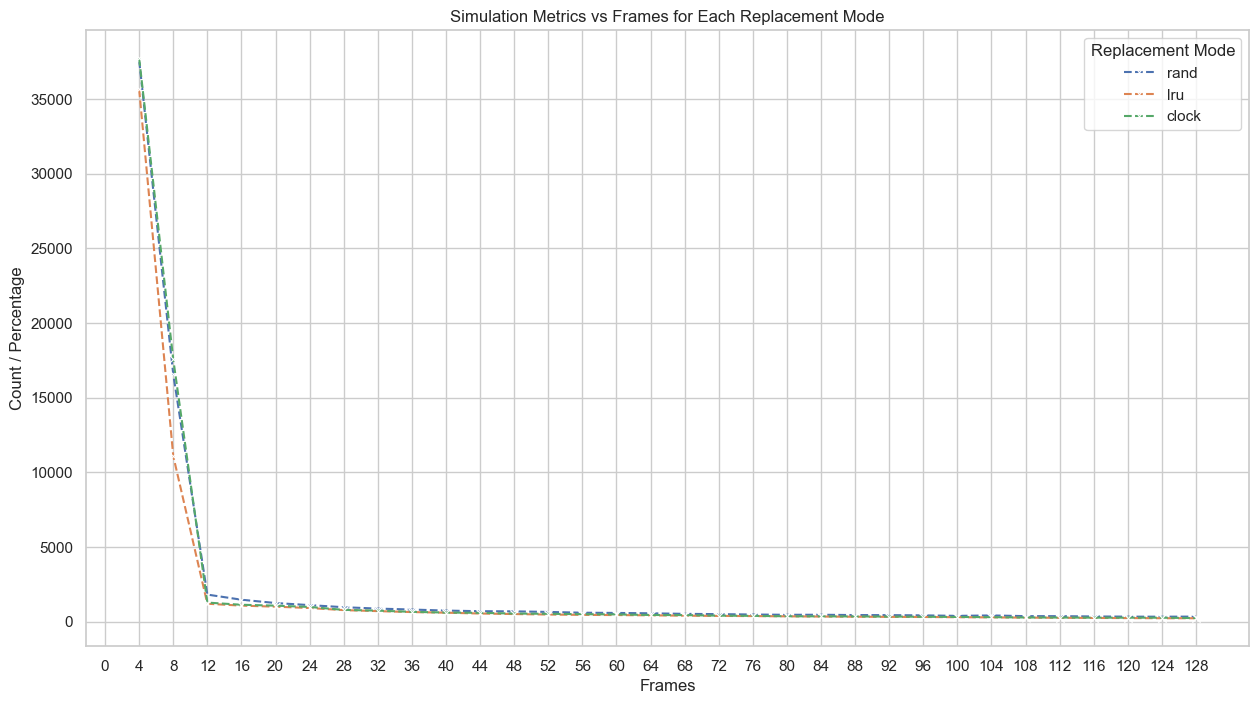

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convert total results into a DataFrame for easy plotting
data = []
for mode in total_results:
    for result in total_results[mode]:
        data.append(result)

df = pd.DataFrame(data)

# Set the Seaborn style
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(15, 8))

# Plot all data for each mode: Disk Reads, Disk Writes, Page Faults
# sns.lineplot(x='Frames', y='Disk Reads', hue='Mode', data=df, linestyle='-', marker='o')
sns.lineplot(x='Frames', y='Disk Writes', hue='Mode', data=df, linestyle='--', marker='x')
# sns.lineplot(x='Frames', y='Page Faults', hue='Mode', data=df, linestyle='-', marker='s')
# sns.lineplot(x='Frames', y='Hit Rate', hue='Mode', data=df, linestyle=':', marker='^')

# Set the labels and title
plt.xlabel('Frames')
plt.ylabel('Count / Percentage')
plt.title('Simulation Metrics vs Frames for Each Replacement Mode')

# Customize the x-axis to show only multiples of 4
frame_max = df['Frames'].max()
plt.xticks(range(0, frame_max + 1, 4))

# Show the legend manually to avoid the error
plt.legend(title='Replacement Mode', loc='best')

# Show the plot
plt.show()